In [64]:
import yfinance as yf
import datetime
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss

In [65]:
#   Choose your stock
symbol = "NVDA"
#for symbol in symbols:
results_dict = {}
#   List of symbols for technical indicators
start = (datetime.date.today() - datetime.timedelta(10000) )
#   End time
end = datetime.datetime.today()
#   Data from yahoo finance
data = yf.download(symbol, start=start, end=end, interval="1d")

[*********************100%***********************]  1 of 1 completed


In [66]:
data.rename(columns={"Close": 'close', "High": 'high', "Low": 'low', 'Volume': 'volume', 'Open': 'open'}, inplace=True)
#   Set index name
data["Date"] = data.index
data['DATE'] = data['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
df = data[["DATE","close"]]
df = df[df["DATE"]>"2012-1-1"]
df.head()

,DATE,close
Date,,
2012-10-01,2012-10-01,3.2800
2012-10-02,2012-10-02,3.2925
2012-10-03,2012-10-03,3.2600
2012-10-04,2012-10-04,3.4050
2012-10-05,2012-10-05,3.3250


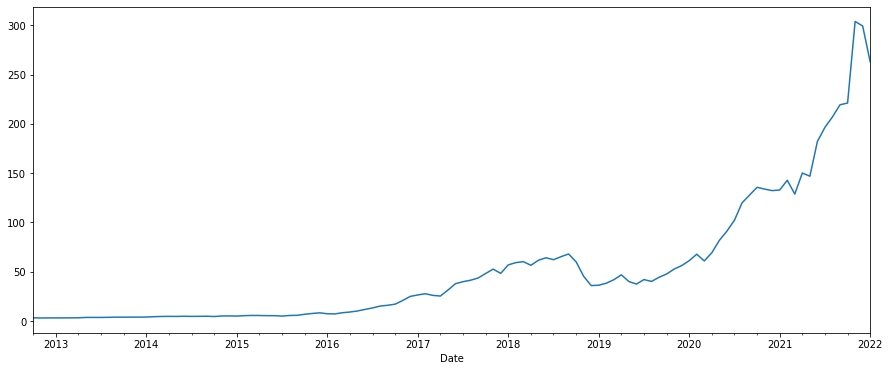

In [67]:
avg = df["close"].resample("M").mean()
avg.plot(figsize=(15,6))

plt.show()

ADF test is used to determine the presence of unit root in the series. Is series stationary or not.
* if the p-value is less than the critical value, the series is stationary


In [68]:
#ADF test on timeseries:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

KPSS test is used to see stationary of time series.


In [69]:
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [70]:
avg = df["close"].resample("M").mean()
adf_test(avg)
print("------")
kpss_test(avg)

Results of Dickey-Fuller Test:
Test Statistic                   2.532021
p-value                          0.999059
#Lags Used                      11.000000
Number of Observations Used    100.000000
Critical Value (1%)             -3.497501
Critical Value (5%)             -2.890906
Critical Value (10%)            -2.582435
dtype: float64
------
Results of KPSS Test:
Test Statistic           1.258679
p-value                  0.010000
Lags Used                6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


c:\Users\Aapop\PycharmProjects\pythonProject\Data\env\lib\site-packages\statsmodels\tsa\stattools.py:2011: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Based on both test series in non-stationary!

Detrending by differencing

<AxesSubplot:xlabel='Date'>

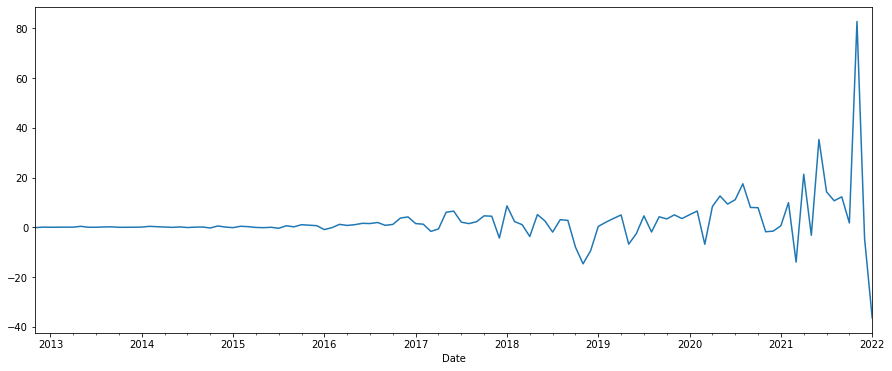

In [71]:
dat = avg-avg.shift(1)
dat.dropna().plot(figsize=(15,6))

In [72]:
dat = dat.dropna()
adf_test(dat)

Results of Dickey-Fuller Test:
Test Statistic                  0.208259
p-value                         0.972721
#Lags Used                     13.000000
Number of Observations Used    97.000000
Critical Value (1%)            -3.499637
Critical Value (5%)            -2.891831
Critical Value (10%)           -2.582928
dtype: float64


Series is non-stationary so regression approach will fail in most cases!